# Importing libraries for EDA

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
%matplotlib inline

# Reading data using pandas

In [127]:
df = pd.read_csv('red_wine_quality_data\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Initiating EDA

In [128]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [129]:
df.shape

(1599, 12)

In [130]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [131]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [133]:
#info on target variable

#1. unique values

print(df['quality'].unique())

#2. count of each quality measure

print(df['quality'].value_counts())

#3. average quality

print(df['quality'].mean())

[5 6 7 4 8 3]
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
5.6360225140712945


<AxesSubplot:xlabel='quality', ylabel='count'>

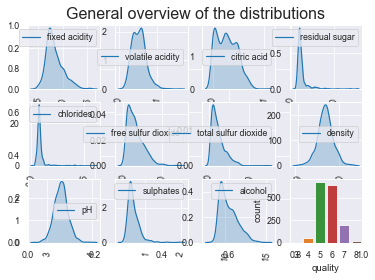

In [134]:
col_list = df.columns[:-1]

fig = plt.figure()
fig.subplots_adjust()
#mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 200

plt.title('General overview of the distributions',size=16)

# loop for all quantitative variables -
for i, c in zip(range(1,len(col_list)+1), col_list):
    ax = fig.add_subplot(3,4,i)
    sns.kdeplot(df[c],ax=ax,shade=True)
    plt.xticks(rotation=80)

# frequency chart for the target variable ; Quality -  
ax = fig.add_subplot(3,4,12)
sns.countplot(df['quality'],ax=ax)



In [138]:
for i in df.columns:
    print(i, ':-')
    print('Minimum value:', df[i].min())
    print('Minimum value:', df[i].max())
    print()

fixed acidity :-
Minimum value: 4.6
Minimum value: 15.9

volatile acidity :-
Minimum value: 0.12
Minimum value: 1.58

citric acid :-
Minimum value: 0.0
Minimum value: 1.0

residual sugar :-
Minimum value: 0.9
Minimum value: 15.5

chlorides :-
Minimum value: 0.012
Minimum value: 0.611

free sulfur dioxide :-
Minimum value: 1.0
Minimum value: 72.0

total sulfur dioxide :-
Minimum value: 6.0
Minimum value: 289.0

density :-
Minimum value: 0.99007
Minimum value: 1.00369

pH :-
Minimum value: 2.74
Minimum value: 4.01

sulphates :-
Minimum value: 0.33
Minimum value: 2.0

alcohol :-
Minimum value: 8.4
Minimum value: 14.9

quality :-
Minimum value: 3
Minimum value: 8



* There are in total 12 variable, of which 11 are predictors that are numerical and one target which is qualitative

* There are no missing values

* The following variables follow a normal distribution - 

1. Density

2. pH

    The others such as Fixed acidity, volatile acidity, citric acid, residual sugar etc. are highly right skewed, which also indicates that there might be outliers. we would not be removing those because their values reflect the dependence on the quality of the wine. 

    In the target variable, the maximum number of wines seem to belong to the quality '5' or '6'

<AxesSubplot:>

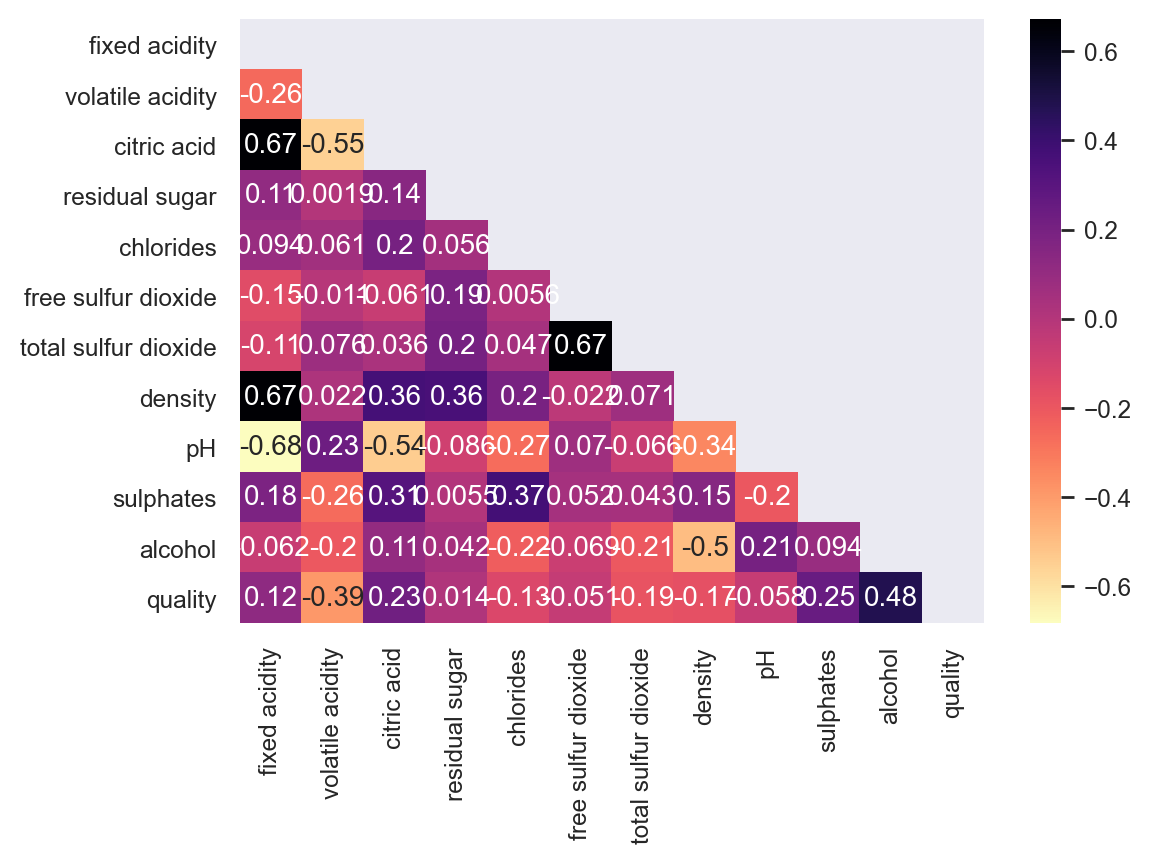

In [139]:
corr= df.corr()

# getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, cmap='magma_r')

Here are some facts to corroborate the correlations - 

1. Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth. Most wine pH's fall around 3 or 4; a pH of about 3.3 to 3.6 is best for reds. Wine of the optimal quality has the least pH, as can be seen in the chart.

2. A higher magnitude of volatile acidity could be an indicator of spoilage, or errors in the manufacturing processes - caused by things like damaged grapes, wine exposed to air, and so on. This causes the bacteria that cause the formation of acetic acid to enter and spoil the Wine, giving rise to unpleasant tastes and smells, making it undesirable.

3. Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes (iron residual). It can be added to finished wines to increase acidity and give a “fresh” flavor. Excess addition ( > 0.7 g/L ), however, can ruin the taste.A good wine has citric acid conc. anywhere between 0.25 - 0.36 g/L .

4. Sulfates are salts of SO2 that are used to correct the mineral deficiencies in wine, if any. It is usually added by winemakers to protect the wine from negative effects of exposure to air and oxygen. Best quality wines usually have more SO2 content on average as compared to lower quality wines.

5. During fermentation, the sugar in the juice is converted into ethanol with carbon dioxide as a waste gas. Monitoring the density during the process allows for optimal control of this conversion step for highest quality wines. Sweeter wines generally have higher densities.After fermentation is complete, the density (specific gravity) of your wine should be at, or slightly less than 1.00, usually 0.996 to be considered as high quality.

6. Chlorides add to the saltiness of the wine. Too much saltiness is considered undesirable.

7. To make a wine that tastes good, the key is to have a perfect balance between the sweetness and the sourness in the drink.


In [140]:
# let us now address the issue of multicollinearity

"""
Multicollinearity occurs when there are two or more independent variables which have a high correlation among themselves. 
When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. 
Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).
"""
X = df.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                 feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866


Usually a VIF value of over 5 indicates high multicollinearity, but since VIFs for all columns is very high it is futile to drop any of them.

# Feature engineering for the target variable

In [141]:
# creating bins and dividing wine into 'good' and 'bad' based on the multple classes [5, 6, 7, 4, 8, 3]

bins = (2, 5, 8)  # if wine_quality is below 5 then label = bad, if wine_quality is above 5 but below 8, label = good
group_names = [0, 1]
df['quality_labels'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [142]:
df['quality_labels'].value_counts()

1    855
0    744
Name: quality_labels, dtype: int64

In [143]:
df.drop(['quality'],axis=1,inplace=True)

The data is pretty balanced, so no need to rationalise that. After dropping the original 'quality' variable and retaining the newly made, labelled version of the same, saving the new dataframe as a csv for predictive modelling.

In [144]:
df.to_csv('red_wine_quality\wine_quality_training.csv')